I have penned this article on [Bayesian Thinking](https://dsaikrishna.wordpress.com/2021/06/12/bayesian-thinking-for-a-better-world/) which discusses the math and intuition behind the bayesian probabilities. The following is a python implementation of a little more complex problem.

In [63]:
#Importing libraries
import numpy as np
import pandas as pd

### Consider the following problem. There are five 'infinite' bags with given priors; determine the posterior probability in the light of new evidence as you pick candies.
h1 (prior: 10%): This type of bag contains 100% cherry candies.<br>
h2 (prior: 20%): This type of bag contains 75% cherry candies and 25% lime candies.<br>
h3 (prior: 40%): This type of bag contains 50% cherry candies and 50% lime candies.<br>
h4 (prior: 20%): This type of bag contains 25% cherry candies and 75% lime candies.<br>
h5 (prior: 10%): This type of bag contains 100% lime candies 

In [14]:
# Probability of finding candies in each of the bags. 
p_c_1 = 1
p_c_2 = 0.75
p_c_3 = 0.5
p_c_4 = 0.25
p_c_5 = 0

In [50]:
hypotheses = 'h1', 'h2', 'h3', 'h4', 'h5'
priors = 0.1, 0.2, 0.4, 0.2, 0.1
prior = pd.Series(priors,hypotheses)
prior

h1    0.1
h2    0.2
h3    0.4
h4    0.2
h5    0.1
dtype: float64

In [23]:
# New Evidence - Candy picked
Q ="C"

In [24]:
# If the first picked is Candy - what is the likelihood that its from each of the bags?
likelihoods = 1, 0.75, 0.5, 0.25, 0

#Computing it through code:
likelihoods = (p_c_1, p_c_2, p_c_3, p_c_4, p_c_5) if Q=="C" else (1-p_c_1, 1-p_c_2, 1-p_c_3, 1-p_c_4, 1-p_c_5)

In [25]:
likelihoods

(1, 0.75, 0.5, 0.25, 0)

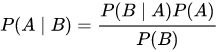

In [26]:
unnorm = prior * likelihoods 

posterior = unnorm/unnorm.sum()
posterior

h1    0.2
h2    0.3
h3    0.4
h4    0.1
h5    0.0
dtype: float64

In [27]:
posterior.sum()

1.0

In [30]:
# Now, consider another ball is picked - posterior becomes prior

#Evidence
Q="CL"

prior = posterior

# Likelihoods don't change as it as infinite bag.
likelihoods = (p_c_1, p_c_2, p_c_3, p_c_4, p_c_5) if Q[-1]=="C" else (1-p_c_1, 1-p_c_2, 1-p_c_3, 1-p_c_4, 1-p_c_5)

#New posterior:
unnorm = prior * likelihoods 
posterior = unnorm/unnorm.sum()
posterior

h1    0.000000
h2    0.214286
h3    0.571429
h4    0.214286
h5    0.000000
dtype: float64

In [31]:
posterior.sum()

1.0

In [45]:
# Function for any length of evidence:
def get_posteriors_bags(evidence, p_c, prior):
    '''
    evidence: New evidence string;
    p_c: Tuple containing probability of finding candy in each of the bag
    prior: Given priors
    '''
    
    file1 = open("result.txt","w")
    l1 = "Observation of sequence Q: {}\n".format(evidence)
    l2 = "Length of Q: {}\n".format(len(evidence))
    file1.writelines([l1,l2,'\n'])
    

    if evidence=='':
        l = 'After observation {} = {}\n'.format(0,'')
        file1.writelines([l,'\n'])
        l1 = 'P(h1 | Q) = {}\n'.format(prior['h1'])
        l2 = 'P(h2 | Q) = {}\n'.format(prior['h2'])
        l3 = 'P(h3 | Q) = {}\n'.format(prior['h3'])
        l4 = 'P(h4 | Q) = {}\n'.format(prior['h4'])
        l5 = 'P(h5 | Q) = {}\n'.format(prior['h5'])
        file1.writelines([l1,l2,l3,l4,l5,'\n'])
        l1 = 'Probability that the next candy we pick will be C, given Q: {}\n'.format((prior*p_c).sum())
        l2 = 'Probability that the next candy we pick will be L, given Q: {}\n'.format(1-(prior*p_c).sum())
        file1.writelines([l1,l2,'\n'])
        return prior
    
    for i in range(len(evidence)):
        likelihoods = p_c if evidence[i]=="C" else tuple([1-i for i in p_c]) #Since infinite bag; likelihood won't change with iterations
        unnorm = prior * likelihoods 
        posterior = unnorm/unnorm.sum()
        
        l = 'After observation {} = {}\n'.format(i+1,evidence[i])
        file1.writelines([l,'\n'])
        l1 = 'P(h1 | Q) = {}\n'.format(posterior['h1'])
        l2 = 'P(h2 | Q) = {}\n'.format(posterior['h2'])
        l3 = 'P(h3 | Q) = {}\n'.format(posterior['h3'])
        l4 = 'P(h4 | Q) = {}\n'.format(posterior['h4'])
        l5 = 'P(h5 | Q) = {}\n'.format(posterior['h5'])
        file1.writelines([l1,l2,l3,l4,l5,'\n'])
        l1 = 'Probability that the next candy we pick will be C, given Q: {}\n'.format((posterior*p_c).sum())
        l2 = 'Probability that the next candy we pick will be L, given Q: {}\n'.format(1-(posterior*p_c).sum())
        file1.writelines([l1,l2,'\n'])
        prior = posterior
        
    file1.close()
    return posterior

In [49]:
p_c = (p_c_1, p_c_2, p_c_3, p_c_4, p_c_5)

In [66]:
evidence=input('Enter sequence of candies picked: ')

Enter sequence of candies picked: CLCCLLC


In [67]:
posterior = get_posteriors_bags(evidence,p_c,prior)

In [68]:
posterior

h1    0.000000
h2    0.222527
h3    0.703297
h4    0.074176
h5    0.000000
dtype: float64

In [70]:
posterior.sum()

1.0